<a href="https://colab.research.google.com/github/kplam3003/Phuoc-Lam/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import torch
import torchvision
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import json

In [ ]:
use_pretrained = True
net = models.vgg16(pretrained = use_pretrained)
net.eval()
print(net)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [41]:
class BaseTransform():
  def __init__(self, resize, mean, std):
    self.base_transform = transforms.Compose([transforms.Resize(resize),transforms.CenterCrop(resize),transforms.ToTensor(),transforms.Normalize(mean,std)])
  def __call__(self,img):
    return self.base_transform(img)

In [ ]:
!pip install wget
import wget

In [ ]:
link = "https://www.rd.com/wp-content/uploads/2009/02/3D4D57AA-5E09-474E-BC53-0E6D03A18F5C-scaled-e1606771409630.jpg?resize=1536,1536"

In [25]:
!ls

Dog_image.webp	dog.jpg


In [72]:
image_file_path = "/content/data1/dog.jpg"

In [73]:
img= Image.open(image_file_path)

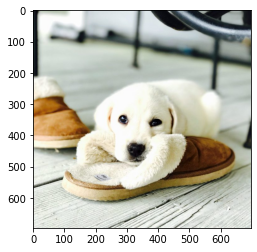

In [33]:
plt.imshow(img)

In [74]:
resize =224
mean=(0.485, 0.456, 0.406)
std = (0.229,0.224,0.225)
#co dinh

In [75]:
transform = BaseTransform(resize,mean,std)

In [76]:
img_transformed = transform(img)

In [71]:
img_transformed = np.clip(img_transformed,0,1)
img_transformed.shape

(224, 224, 3)

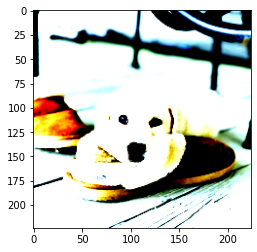

In [58]:
plt.imshow(img_transformed)
plt.show()

In [65]:
class Predictor:
  def __init__(self, class_index):
    self.class_index = class_index

  def predict_max(self, out):
    maxid = np.argmax(out.detach().numpy())
    predicted_label_name = self.class_index[str(maxid)]

    return predicted_label_name

In [68]:
class_index = json.load(open('/content/data1/imagenet_class_index.json','r'))

In [ ]:
class_index

In [70]:
predictor = Predictor(class_index)

In [77]:
img_transformed = img_transformed.unsqueeze_(0)
out= net(img_transformed)
result = predictor.predict_max(out)
print("result is", result)

result is ['n02099712', 'Labrador_retriever']
